In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [150]:
#importing the state_gdp data into dataframe,df
df=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/ab40c054-5031-4376-b52e-9813e776f65e.csv")
df.head(3)

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0


In [151]:
#Dimensions of a data frame
df.shape

(11, 36)

In [152]:
#checking if the data are in required datatype
df.dtypes

Items  Description            object
Duration                      object
Andhra Pradesh               float64
Arunachal Pradesh            float64
Assam                        float64
Bihar                        float64
Chhattisgarh                 float64
Goa                          float64
Gujarat                      float64
Haryana                      float64
Himachal Pradesh             float64
Jammu & Kashmir              float64
Jharkhand                    float64
Karnataka                    float64
Kerala                       float64
Madhya Pradesh               float64
Maharashtra                  float64
Manipur                      float64
Meghalaya                    float64
Mizoram                      float64
Nagaland                     float64
Odisha                       float64
Punjab                       float64
Rajasthan                    float64
Sikkim                       float64
Tamil Nadu                   float64
Telangana                    float64
T

In [153]:
#Following will check NA values in data set
print("Null values in each column :")
print(df.isnull().sum())
print("------------------------")
print("Null values present :", df.isnull().values.any())
print("------------------------")
print("Total number of null values:" ,df.isnull().values.sum())

Null values in each column :
Items  Description            0
Duration                      0
Andhra Pradesh                0
Arunachal Pradesh             2
Assam                         2
Bihar                         2
Chhattisgarh                  0
Goa                           2
Gujarat                       2
Haryana                       0
Himachal Pradesh              4
Jammu & Kashmir               2
Jharkhand                     2
Karnataka                     2
Kerala                        2
Madhya Pradesh                0
Maharashtra                   4
Manipur                       4
Meghalaya                     0
Mizoram                       4
Nagaland                      4
Odisha                        0
Punjab                        4
Rajasthan                     4
Sikkim                        2
Tamil Nadu                    0
Telangana                     0
Tripura                       4
Uttar Pradesh                 2
Uttarakhand                   2
West Bengal

**Data cleaning**

In [154]:
#NA percentage in each column

round(100*(df.isnull().sum(axis=0)/len(df.index)),2)

Items  Description             0.00
Duration                       0.00
Andhra Pradesh                 0.00
Arunachal Pradesh             18.18
Assam                         18.18
Bihar                         18.18
Chhattisgarh                   0.00
Goa                           18.18
Gujarat                       18.18
Haryana                        0.00
Himachal Pradesh              36.36
Jammu & Kashmir               18.18
Jharkhand                     18.18
Karnataka                     18.18
Kerala                        18.18
Madhya Pradesh                 0.00
Maharashtra                   36.36
Manipur                       36.36
Meghalaya                      0.00
Mizoram                       36.36
Nagaland                      36.36
Odisha                         0.00
Punjab                        36.36
Rajasthan                     36.36
Sikkim                        18.18
Tamil Nadu                     0.00
Telangana                      0.00
Tripura                     

In [155]:
#NA values in westbengal is 100% which means entire column is empty, hence deleting west bengal column from dataset
df=df.drop("West Bengal1",axis=1)

In [156]:
df.columns

Index(['Items  Description', 'Duration', 'Andhra Pradesh ',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'Andaman & Nicobar Islands', 'Chandigarh', 'Delhi',
       'Puducherry', 'All_India GDP'],
      dtype='object')

In [157]:
#NA percentage in each row

100*(df.isnull().sum(axis=1)/(df.shape[1]))

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4     25.714286
5     62.857143
6      0.000000
7      0.000000
8      0.000000
9     25.714286
10    62.857143
dtype: float64

In [158]:
#row GSDP(2016-17) has 62% null values which is relatively high and as mentioned in instruction, this row is removed
df=df[~(df["Duration"]=="2016-17")]

In [159]:
#NA percentage in each row
100*(df.isnull().sum(axis=1)/(df.shape[1]))
print("------------------------")
print("Null values present :", df.isnull().values.any())
print("------------------------")
print("Total number of null values:" ,df.isnull().values.sum())

------------------------
Null values present : True
------------------------
Total number of null values: 18


**Thus, total number of null values have been reduced from 73 to 18**

## Part-I: GDP Analysis of the Indian States

### Part I-A:
#### 1.Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.**

In [160]:
#Growth over the previous year and GSDP-CURRENT PRICES for the year 2016-17 has been already removed in data cleaning
df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,751485.00,359433.00,19208.00,724049.00,115523.00,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,855481.00,401493.00,21663.00,822903.00,131835.00,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,971090.00,452186.00,25593.00,944146.00,149817.00,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,1092564.00,511178.00,29667.00,1043371.00,161985.00,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,1212668.00,575631.00,NaN,1153795.00,184091.00,NaN,30304.00,551963.00,26533.00,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.84,11.70,12.78,13.65,14.12,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


#### 2. Calculate the average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'


In [161]:
#creating a list with all states name (ignoring all_india_gdp)
state_list_1=df.columns.tolist()[2:-1]

#creating a list with average of Growth over previous year for "2013-2016" 
average_list=(df.loc[[7,8,9],:]).mean().values

#creating new data frame for plotting and analysis
average_growth_df=pd.DataFrame({"States":state_list_1,"Average":average_list[:-1]},
                    columns= ["States","Average"])

#sorting by average
average_growth_df=average_growth_df.sort_values(by="Average",ascending=True)
average_growth_df


,States,Average
5,Goa,6.033333
16,Meghalaya,6.953333
19,Odisha,9.836667
22,Sikkim,10.486667
9,Jammu & Kashmir,10.900000
6,Gujarat,11.126667
20,Punjab,11.185000
14,Maharashtra,11.260000
21,Rajasthan,11.320000
10,Jharkhand,11.500000


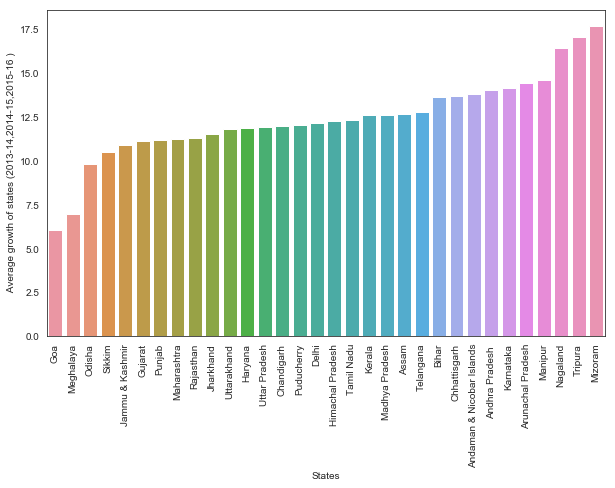

In [162]:
#plotting states against growth%
plt.figure(figsize=(10,6))
x=sns.barplot(x=average_growth_df["States"],y=average_growth_df["Average"]).set_xticklabels(average_growth_df["States"],rotation=90)
plt.ylabel(" Average growth of states (2013-14,2014-15,2015-16 )")
plt.show()


**Which states have been growing consistently fast, and which ones have been struggling?**

From the previous plot, it is evident that Mizoram, Tripura, Nagaland are consistently growing states while Goa,Meghalaya and Odisha are struggling over the years 2013 to 2016

#### 3.Total GDP of the states for the year 2015-16

In [163]:
#creating a list with all states name (ignoring all_india_gdp)
state_list_1=df.columns.tolist()[2:-1]

#creating a list with total GDP for the year 2015-2016 
gdp_2015_16_list=(df.loc[4,:]).tolist()[2:-1]

#creating new data frame for plotting and analysis of total GDP
gdp_2015_2016_df=pd.DataFrame({"States":state_list_1,"GDP(2015-2016)":gdp_2015_16_list},columns= ["States","GDP(2015-2016)"])

# Ignoring columns with NAN values
gdp_2015_2016_df = gdp_2015_2016_df[~gdp_2015_2016_df["GDP(2015-2016)"].isnull()]

#Dataframe sorted to get top 5 and bottom 5 states
gdp_2015_2016_df=gdp_2015_2016_df.sort_values(by="GDP(2015-2016)",ascending= True)
gdp_2015_2016_df

,States,GDP(2015-2016)
22,Sikkim,16637.0
1,Arunachal Pradesh,18784.0
31,Puducherry,26533.0
16,Meghalaya,26745.0
29,Chandigarh,30304.0
5,Goa,45002.0
9,Jammu & Kashmir,118387.0
27,Uttarakhand,184091.0
2,Assam,224234.0
10,Jharkhand,241955.0


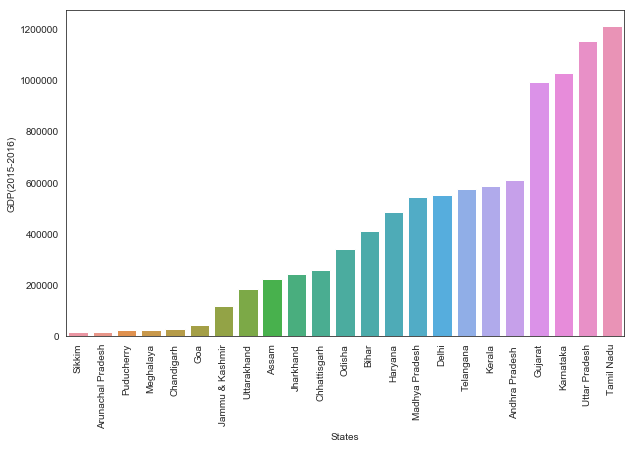

In [164]:
#plotting states against Total GDP(2015-2016)
plt.figure(figsize=(10,6))
sns.barplot(x=gdp_2015_2016_df["States"],y=gdp_2015_2016_df["GDP(2015-2016)"]).set_xticklabels(gdp_2015_2016_df["States"],rotation=90)
plt.show()

**Top 5 and Bottom 5 states based on the Total GDP(2015-2016)**

In [165]:
#Top 5 states with highest GDP
print("\033[1m Bottom 5 states with the lowest GDP are : \033[0m")
print("-------------------------------------------")
m=gdp_2015_2016_df.head(5)["States"].to_list()
for states in m:
    print(states)

#Bottom 5 states with lowest GDP
print("\033[1m Top 5 states with highest GDP are : \033[0m")
print("------------------------------------------")
gdp_2015_2016_df=gdp_2015_2016_df.sort_values(by="GDP(2015-2016)",ascending= False)
n=gdp_2015_2016_df.head(5)["States"].to_list()
for states in n:
    print(states)

 Bottom 5 states with the lowest GDP are : 
-------------------------------------------
Sikkim
Arunachal Pradesh
Puducherry
Meghalaya
Chandigarh
 Top 5 states with highest GDP are : 
------------------------------------------
Tamil Nadu
Uttar Pradesh
Karnataka
Gujarat
Andhra Pradesh 


## Part 1-B
    

In [166]:
#importing datasets of states
Andhra_Pradesh=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv")
Arunachal_Pradesh=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv")
Assam=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Assam-GSVA_cur_2015-16.csv")
Bihar=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Bihar-GSVA_cur_2015-16.csv")
Chhattisgarh=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Chhattisgarh-GSVA_cur_2016-17.csv")
Goa=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Goa-GSVA_cur_2015-16.csv")
Gujarat=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Gujarat-GSVA_cur_2015-16.csv")
Haryana=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Haryana-GSVA_cur_2016-17.csv")
Himachal_Pradesh=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv")
Jammu_Kashmir=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Jammu_Kashmir-GSVA_cur_2015-16.csv")
Jharkhand=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Jharkhand-GSVA_cur_2015-16.csv")
Karnataka=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Karnataka-GSVA_cur_2015-16.csv")
Kerala=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Kerala-GSVA_cur_2015-16.csv")
Madhya_Pradesh=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv")
Maharashtra=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Maharashtra-GSVA_cur_2014-15.csv")
Manipur=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Manipur-GSVA_cur_2014-15.csv",encoding = "ISO-8859-1")
Meghalaya=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Meghalaya-GSVA_cur_2016-17.csv")
Mizoram=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Mizoram-GSVA_cur_2014-15.csv")
Nagaland=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Nagaland-GSVA_cur_2014-15.csv")
Odisha=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Odisha-GSVA_cur_2016-17.csv")
Punjab=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Punjab-GSVA_cur_2014-15.csv")
Rajasthan=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Rajasthan-GSVA_cur_2014-15.csv")
Sikkim=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Sikkim-GSVA_cur_2015-16.csv")
Tamil_Nadu=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Tamil_Nadu-GSVA_cur_2016-17.csv")
Telangana=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Telangana-GSVA_cur_2016-17.csv")
Tripura=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Tripura-GSVA_cur_2014-15.csv")
Uttar_Pradesh=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Uttar_Pradesh-GSVA_cur_2015-16.csv")
Uttarakhand=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Uttarakhand-GSVA_cur_2015-16.csv")

#importing datasets of union territories
Chandigarh=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Chandigarh-GSVA_cur_2015-16.csv")
Delhi=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Delhi-GSVA_cur_2016-17.csv")
Puducherry=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Puducherry-GSVA_cur_2016-17.csv")
Andaman_Nicobar_Islands=pd.read_csv("C:/Users/Deepak Ramana/Downloads/gdp/states/NAD-Andaman_Nicobar_Islands-GSVA_cur_2014-15.csv")


In [167]:
#creating new data frame to analyze total GDP per capita with respect to states

dfb=pd.DataFrame()
dfb["Item"]=Andhra_Pradesh["Item"]
dfb["Andhra_Pradesh"]=Andhra_Pradesh["2014-15"]
dfb["Arunachal_Pradesh"]=Arunachal_Pradesh["2014-15"]
dfb["Assam"]=Assam["2014-15"]
dfb["Bihar"]=Bihar["2014-15"]
dfb["Chhattisgarh"]=Chhattisgarh["2014-15"]
dfb["Bihar"]=Bihar["2014-15"]
dfb["Goa"]=Goa["2014-15"]
dfb["Gujarat"]=Gujarat["2014-15"]
dfb["Haryana"]=Haryana["2014-15"]
dfb["Himachal_Pradesh"]=Himachal_Pradesh["2014-15"]
dfb["Jammu_Kashmir"]=Jammu_Kashmir["2014-15"]
dfb["Jharkhand"]=Jharkhand["2014-15"]
dfb["Karnataka"]=Karnataka["2014-15"]
dfb["Kerala"]=Kerala["2014-15"]
dfb["Madhya_Pradesh"]=Madhya_Pradesh["2014-15"]
dfb["Maharashtra"]=Maharashtra["2014-15"]
dfb["Manipur"]=Manipur["2014-15"]
dfb["Meghalaya"]=Meghalaya["2014-15"]
dfb["Mizoram"]=Mizoram["2014-15"]
dfb["Nagaland"]=Nagaland["2014-15"]
dfb["Odisha"]=Odisha["2014-15"]
dfb["Punjab"]=Punjab["2014-15"]
dfb["Rajasthan"]=Rajasthan["2014-15"]
dfb["Sikkim"]=Sikkim["2014-15"]
dfb["Tamil_Nadu"]=Tamil_Nadu["2014-15"]
dfb["Telangana"]=Telangana["2014-15"]
dfb["Tripura"]=Tripura["2014-15"]
dfb["Uttar_Pradesh"]=Uttar_Pradesh["2014-15"]
dfb["Uttarakhand"]=Uttarakhand["2014-15"]
dfb["Chandigarh"]=Chandigarh["2014-15"]
dfb["Delhi"]=Delhi["2014-15"]
dfb["Puducherry"]=Puducherry["2014-15"]
dfb["Andaman_Nicobar_Islands"]=Andaman_Nicobar_Islands["2014-15"]
print(dfb.columns)

dfb

Index(['Item', 'Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh',
       'Jammu_Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya_Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil_Nadu', 'Telangana', 'Tripura',
       'Uttar_Pradesh', 'Uttarakhand', 'Chandigarh', 'Delhi', 'Puducherry',
       'Andaman_Nicobar_Islands'],
      dtype='object')


,Item,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal_Pradesh,...,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttar_Pradesh,Uttarakhand,Chandigarh,Delhi,Puducherry,Andaman_Nicobar_Islands
0,"Agriculture, forestry and fishing",14819416,686117,3855548,7951890,3948847,308507,13769969.00,8015238.0,1514981,...,137447,13064238,7591501,799825.0,25097754,1601423.0,16233,250568,113156,76670.0
1,Crops,7893514,415520,2890544,4688237,2613371,140421,9671086.00,4636731.0,853758,...,114976,7297820,4162493,397591.0,16215212,866146.0,1659,64959,38878,34026.0
2,Livestock,4309078,38387,173478,2060296,352208,30141,2698910.00,2916173.0,110304,...,17338,4693361,2951299,88176.0,7096876,391188.0,13992,183770,45358,19560.0
3,Forestry and logging,346160,224017,261987,550132,597785,15744,761616.00,352254.0,540950,...,4529,392705,210741,145096.0,1404936,339293.0,388,861,3931,4634.0
4,Fishing and aquaculture,2270664,8193,529539,653224,385483,122201,638357.00,110080.0,9968,...,604,680352,266968,168961.0,380730,4796.0,194,978,24989,18451.0
5,Mining and quarrying,1484300,30842,1471149,68107,2451970,3622,2117218.00,25186.0,33385,...,1329,265536,1541853,142391.0,901501,244549.0,179,963777,33272,18738.0
6,Primary,16303716,716959,5326697,8019997,6400817,312129,15887187.00,8040424.0,1548366,...,138776,13329774,9133354,942216.0,25999255,1845972.0,16412,1214345,146428,95409.0
7,Manufacturing,4672266,26120,2002936,2189965,4370593,1177608,24087538.00,7756921.0,2543637,...,550697,18914794,6353711,228625.0,12261649,5866252.0,149631,2749307,618297,6650.0
8,"Electricity, gas, water supply & other utility...",1151729,113527,296587,345168,1198438,204110,3409983.00,1101919.0,767268,...,212499,1710379,716266,77870.0,2030625,433880.0,29741,971255,60624,30607.0
9,Construction,4664889,147842,1733568,3449763,2669855,165819,5526017.00,3702571.0,808256,...,82058,12216718,2854024,177899.0,11256450,1342733.0,133321,2048788,316205,69302.0


#### 1.Filter out the union territories (Delhi, Chandigarh, Andaman and Nicobar Islands, etc.) for further analysis, as they are governed directly by the centre, not state governments.m

In [168]:
UT_list= ['Chandigarh', 'Delhi', 'Puducherry','Andaman_Nicobar_Islands']
state_list2=dfb.columns.tolist()
filtered_list=[]

#new list that filters union territories
for i in state_list2:
    if i not in UT_list:
        filtered_list.append(i)
#Data Frame that contains only states and filters Union Territories
gdp_percapita_df = dfb[filtered_list]

gdp_percapita_df
#gdp_percapita_df.to_csv(r"C:\Users\Deepak Ramana\Downloads\gdp\gdp_percapita_df.csv")

,Item,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal_Pradesh,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttar_Pradesh,Uttarakhand
0,"Agriculture, forestry and fishing",14819416,686117,3855548,7951890,3948847,308507,13769969.00,8015238.0,1514981,...,607897,6422978,9285716,15044394,137447,13064238,7591501,799825.0,25097754,1601423.0
1,Crops,7893514,415520,2890544,4688237,2613371,140421,9671086.00,4636731.0,853758,...,375825,4382636,5690972,7673441,114976,7297820,4162493,397591.0,16215212,866146.0
2,Livestock,4309078,38387,173478,2060296,352208,30141,2698910.00,2916173.0,110304,...,123800,788243,2638842,5356257,17338,4693361,2951299,88176.0,7096876,391188.0
3,Forestry and logging,346160,224017,261987,550132,597785,15744,761616.00,352254.0,540950,...,99802,791463,848245,1956660,4529,392705,210741,145096.0,1404936,339293.0
4,Fishing and aquaculture,2270664,8193,529539,653224,385483,122201,638357.00,110080.0,9968,...,8470,460636,107657,58036,604,680352,266968,168961.0,380730,4796.0
5,Mining and quarrying,1484300,30842,1471149,68107,2451970,3622,2117218.00,25186.0,33385,...,8280,2586328,10354,4069385,1329,265536,1541853,142391.0,901501,244549.0
6,Primary,16303716,716959,5326697,8019997,6400817,312129,15887187.00,8040424.0,1548366,...,616178,9009306,9296070,19113780,138776,13329774,9133354,942216.0,25999255,1845972.0
7,Manufacturing,4672266,26120,2002936,2189965,4370593,1177608,24087538.00,7756921.0,2543637,...,18346,5754229,4790341,6552580,550697,18914794,6353711,228625.0,12261649,5866252.0
8,"Electricity, gas, water supply & other utility...",1151729,113527,296587,345168,1198438,204110,3409983.00,1101919.0,767268,...,37944,833067,911611,1122888,212499,1710379,716266,77870.0,2030625,433880.0
9,Construction,4664889,147842,1733568,3449763,2669855,165819,5526017.00,3702571.0,808256,...,156072,2402396,2202962,5353326,82058,12216718,2854024,177899.0,11256450,1342733.0


### 2.Plot the GDP per capita for all the states.

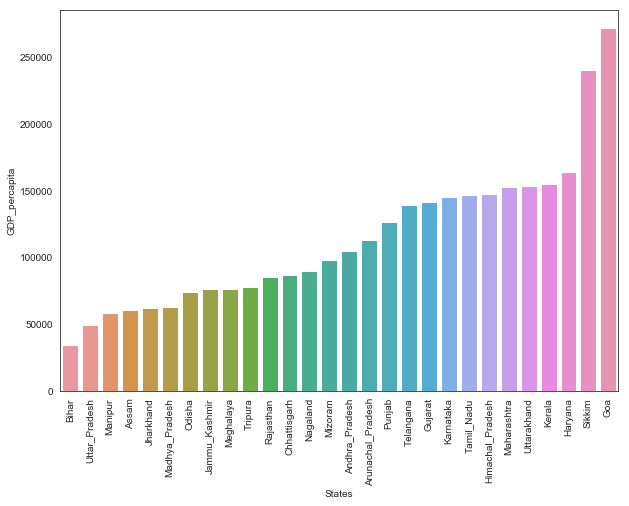

In [169]:
#Plot for GDP per capita for all the states.

plt.figure(figsize=(10,7))

#creating a newlist with all states
statelist= gdp_percapita_df.columns.to_list()[1:]

#creating new list with gdp per capita for all states
gdplist=gdp_percapita_df.iloc[32].to_list()[1:]

#Data frame to visualize GDP per capita for allstates 
gdp_df=pd.DataFrame({"States":statelist,"GDP_percapita":gdplist},columns=["States","GDP_percapita"])

#sorting data frame with respect to GDP per capita 
gdp_df=gdp_df.sort_values(by="GDP_percapita",ascending=True)

#gdp_df
#gdp_df.to_csv(r"C:\Users\Deepak Ramana\Downloads\gdp\gdp_df.csv")

#barplot for GDP per capita
sns.barplot(x=gdp_df["States"],y=gdp_df["GDP_percapita"]).set_xticklabels(gdp_df["States"],rotation=90)
plt.show()

#### 2.a Identify the top 5 and the bottom 5 states based on the GDP per capita.

In [170]:
print("\033[1mThe bottom 5 states with lowest GDP per capita :\033[0m")
print("-------------------------------------------------------------")
for element in gdp_df["States"].head(5).to_list():
    print(element)
    
    
print("\033[1mThe top 5 states with highest GDP per capita :\033[0m")
print("-------------------------------------------------------------")
gdp_df1=gdp_df.sort_values(by="GDP_percapita",ascending=False)
for element in gdp_df1["States"].head(5).to_list():
    print(element)

The bottom 5 states with lowest GDP per capita :
-------------------------------------------------------------
Bihar
Uttar_Pradesh
Manipur
Assam
Jharkhand
The top 5 states with highest GDP per capita :
-------------------------------------------------------------
Goa
Sikkim
Haryana
Kerala
Uttarakhand


**2b.Ratio of highest per capita GDP to lowest per capita GDP**

In [171]:
max_gdp=gdp_df["GDP_percapita"].max()
min_gdp=gdp_df["GDP_percapita"].min()
#print(max_gdp,min_gdp)
ratio=int(max_gdp/min_gdp)
print("The ratio of the highest per capita GDP to the lowest per capita GDP :",ratio)


The ratio of the highest per capita GDP to the lowest per capita GDP : 8


### 3.Percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states

In [172]:
#creating new dataframe to include only primary, secondary,tertiary and TotalGSDP for all states
sectordf=gdp_percapita_df.iloc[[6,10,26,30]]

#Transposing data frame 
sectordf=sectordf.T

#grab the first row for header
new_header=sectordf.loc["Item"]

#Taking data lesser the header row
sectordf=sectordf["Andhra_Pradesh":]

#setting header 
sectordf.columns=new_header

#computing percentage of Primary, Secondary, Tertiary
sectordf["Primary_percentage"]=(sectordf["Primary"]/sectordf["Gross State Domestic Product"])*100
sectordf["secondary_percentage"]=(sectordf["Secondary"]/sectordf["Gross State Domestic Product"])*100
sectordf["Tertiary_percentage"]=(sectordf["Tertiary"]/sectordf["Gross State Domestic Product"])*100

#sort data frame by GSDP
sectordf=sectordf.sort_values(by="Gross State Domestic Product",ascending=False)

#final dataframe
sectordf
#sectordf.to_csv(r"C:\Users\Deepak Ramana\Downloads\gdp\sectordf.csv")



Item,Primary,Secondary,Tertiary,Gross State Domestic Product,Primary_percentage,secondary_percentage,Tertiary_percentage
Maharashtra,21758383,47445207,88631076,179212165,12.1411,26.4743,49.4559
Tamil_Nadu,13329774,32841892,53343788,109256373,12.2005,30.0595,48.8244
Uttar_Pradesh,25999255,25548724,45968959,104337115,24.9185,24.4867,44.0581
Karnataka,12066304,20484404,50490630,92178806,13.0901,22.2225,54.7747
Gujarat,1.58872e+07,3.30235e+07,3.02204e+07,8.95027e+07,17.7505,36.8967,33.7648
Rajasthan,19113780,13028794,26015812,61219447,31.2217,21.2821,42.496
Andhra_Pradesh,16303716,10488884,22032942,52646842,30.9681,19.9231,41.8505
Kerala,6489442,12070040,29673778,52600230,12.3373,22.9467,56.4138
Telangana,9133354,9924001,28471410,51117765,17.8673,19.414,55.6977
Madhya_Pradesh,17854020,10044889,18117360,48198169,37.0429,20.8408,37.5893


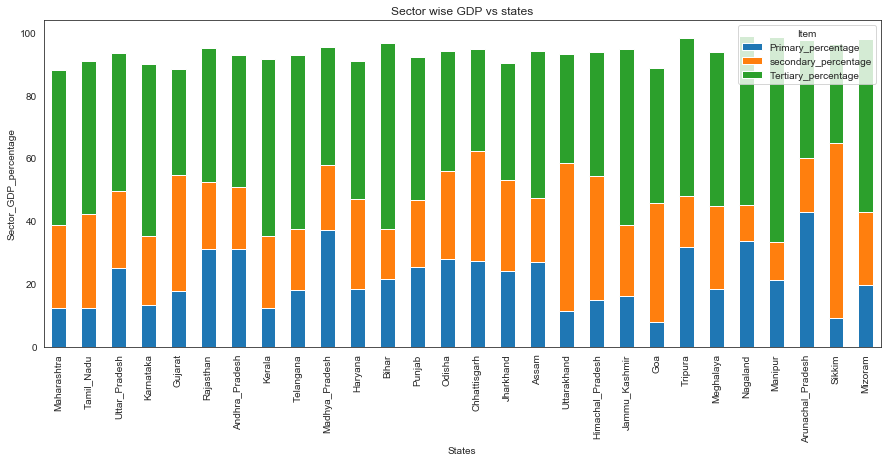

In [173]:
#Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.
sns.set_style("white")
sectordf[["Primary_percentage","secondary_percentage","Tertiary_percentage"]].plot(kind='bar', stacked=True,figsize=(15,6))
plt.title("Sector wise GDP vs states")
plt.ylabel("Sector_GDP_percentage")
plt.xlabel("States")
plt.show()

##### Inference:

As we could see from the previous stacked bar plot, it is evident that secondary and tertiary sectors contribute more towards the total GSDP for all the states.





### 4.Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4)

**Categorisation into four groups**

In [174]:
#determination of Quantile values
quantile_0=np.percentile(gdp_percapita_df.iloc[32].to_list()[1:],0)
quantile_20=np.percentile(gdp_percapita_df.iloc[32].to_list()[1:],20)
quantile_50=np.percentile(gdp_percapita_df.iloc[32].to_list()[1:],50)
quantile_85=np.percentile(gdp_percapita_df.iloc[32].to_list()[1:],85)
quantile_100=np.percentile(gdp_percapita_df.iloc[32].to_list()[1:],100)
#print(quantile_0,quantile_20,quantile_50,quantile_85,quantile_100)

#creating lists to add states to different category (adding item by default for final visualisation)
c1=["Item"]
c2=["Item"]
c3=["Item"]
c4=["Item"]


#creating a new list to add all the states
state_list=gdp_percapita_df.columns[1:].to_list()

#creating a new list to add only gdp per capita
gdp_list=gdp_percapita_df.iloc[32][1:].to_list()

#creating dataframe to categorize state based on gdp per capita
group_df=pd.DataFrame({"State":state_list,"gdp_list":gdp_list},columns=["State","gdp_list"])
group_df

for gdp in gdp_list:
    if gdp >= quantile_0 and gdp<=quantile_20 : #category 4 includes states- per capita gdp between 0 and 20 quantile
        c4.append(group_df[group_df["gdp_list"]== gdp]["State"].values[0])
    elif gdp >quantile_20 and gdp<= quantile_50 :#category 3 includes states-per capita gdp between 20 and 50 quantile
        c3.append(group_df[group_df["gdp_list"]== gdp]["State"].values[0])
    elif gdp >quantile_50 and gdp<= quantile_85: #category 2 include states-per capita gdp between 50 and 85 quantile
        c2.append(group_df[group_df["gdp_list"]== gdp]["State"].values[0])
    else:                                        #category 1 include states-per capita gdp between 85 and 100 quantile
        c1.append(group_df[group_df["gdp_list"]== gdp]["State"].values[0])

print("\033[1mThe states in category 1 (c1) as follows:\033[0m")
for states in c1[1:]:
    print(states)
print("---------------------------------------------")
print("\033[1mThe states in category 2 (c2) as follows:\033[0m")
for states in c2[1:]:
    print(states)
print("---------------------------------------------")
print("\033[1mThe states in category 3 (c3) as follows:\033[0m")
for states in c3[1:]:
    print(states)
print("---------------------------------------------")    
print("\033[1mThe states in category 4 (c4) as follows:\033[0m")
for states in c4[1:]:
    print(states)

The states in category 1 (c1) as follows:
Goa
Haryana
Kerala
Sikkim
Uttarakhand
---------------------------------------------
The states in category 2 (c2) as follows:
Andhra_Pradesh
Arunachal_Pradesh
Gujarat
Himachal_Pradesh
Karnataka
Maharashtra
Punjab
Tamil_Nadu
Telangana
---------------------------------------------
The states in category 3 (c3) as follows:
Chhattisgarh
Jammu_Kashmir
Meghalaya
Mizoram
Nagaland
Odisha
Rajasthan
Tripura
---------------------------------------------
The states in category 4 (c4) as follows:
Assam
Bihar
Jharkhand
Madhya_Pradesh
Manipur
Uttar_Pradesh


### 5.Top sub-sectors that contribute to 80%GDP

In [175]:
#creating data frames for each category considering only the subsectors
c1_df=gdp_percapita_df[c1].iloc[[0,5,7,8,9,12,14,22,23,24,25,30]]
c2_df=gdp_percapita_df[c2].iloc[[0,5,7,8,9,12,14,22,23,24,25,30]]
c3_df=gdp_percapita_df[c3].iloc[[0,5,7,8,9,12,14,22,23,24,25,30]]
c4_df=gdp_percapita_df[c4].iloc[[0,5,7,8,9,12,14,22,23,24,25,30]]



#sectors contributing to 80% of total GDP for each category 

#creating a sum column which sums toatal gdp of all subsectors
c1_df["sum"]=c1_df.sum(axis=1)

#sorting the dataframe to get the top sub-sectors contributing the GDP
c1_df=c1_df.sort_values(by="sum",ascending=False)

#calculating sub ector GDP percentage as percentage of Total GDP for each category
c1_df["sum_percentage"]=round((c1_df["sum"]/c1_df["sum"][30])*100)

#removing the GDSP row 
c1_df=c1_df.iloc[1:]

#calculating cumulative sum to find the sub sectors that contribute to 80%
c1_df["cumsum"]=c1_df["sum_percentage"].cumsum() 

#subsectors that contibute to 80% of GSDP is 
c1_df_top=c1_df[c1_df["cumsum"]<=80]
print("\033[1mThe subsectors that contribute to 80% of total GDP of category 1 are as follows: \033[0m")
for items in c1_df_top["Item"].to_list():
    print(items)
print("--------------------------------------------------------------")
print("\n")



#similar set of operations for category-2
c2_df["sum"]=c2_df.sum(axis=1)
c2_df=c2_df.sort_values(by="sum",ascending=False)
c2_df["sum_percentage"]=round((c2_df["sum"]/c2_df["sum"][30])*100)
c2_df=c2_df.iloc[1:]
c2_df["cumsum"]=c2_df["sum_percentage"].cumsum()
c2_df_top=c2_df[c2_df["cumsum"]<=80]
print("\033[1mThe subsectors that contribute to 80% of total GDP of category 2 are as follows: \033[0m")
for items in c2_df_top["Item"].to_list():
    print(items)
print("--------------------------------------------------------------")
print("\n")


#similar set of operations for category-3
c3_df["sum"]=c3_df.sum(axis=1)
c3_df=c3_df.sort_values(by="sum",ascending=False)
c3_df["sum_percentage"]=round((c3_df["sum"]/c3_df["sum"][30])*100)
c3_df=c3_df.iloc[1:]
c3_df["cumsum"]=c3_df["sum_percentage"].cumsum()    
c3_df_top=c3_df[c3_df["cumsum"]<=80]
print("\033[1mThe subsectors that contribute to 80% of total GDP of category 3 are as follows: \033[0m")
for items in c3_df_top["Item"].to_list():
    print(items)
print("--------------------------------------------------------------")
print("\n")


#similar set of operations for category-4
c4_df["sum"]=c4_df.sum(axis=1)
c4_df=c4_df.sort_values(by="sum",ascending=False)
c4_df["sum_percentage"]=round((c4_df["sum"]/c4_df["sum"][30])*100)
c4_df=c4_df.iloc[1:]
c4_df["cumsum"]=c4_df["sum_percentage"].cumsum() 
c4_df_top=c4_df[c4_df["cumsum"]<=80]
print("\033[1mThe subsectors that contribute to 80% of total GDP of category 4 are as follows: \033[0m")
for items in c4_df_top["Item"].to_list():
    print(items)



The subsectors that contribute to 80% of total GDP of category 1 are as follows: 
Manufacturing
Agriculture, forestry and fishing
Real estate, ownership of dwelling & professional services
Trade & repair services
Construction
Other services
--------------------------------------------------------------


The subsectors that contribute to 80% of total GDP of category 2 are as follows: 
Manufacturing
Real estate, ownership of dwelling & professional services
Agriculture, forestry and fishing
Trade & repair services
Construction
Other services
Financial services
Transport, storage, communication & services related to broadcasting
--------------------------------------------------------------


The subsectors that contribute to 80% of total GDP of category 3 are as follows: 
Agriculture, forestry and fishing
Manufacturing
Real estate, ownership of dwelling & professional services
Trade & repair services
Construction
Other services
Mining and quarrying
--------------------------------------

###  5.a  Plotting contribution of the sub-sectors as a percentage of the GSDP of each category

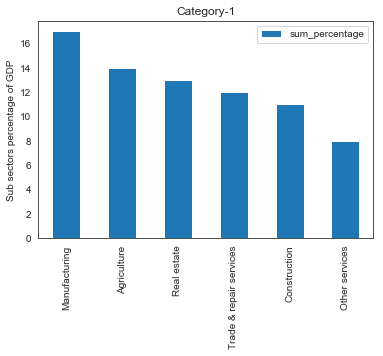

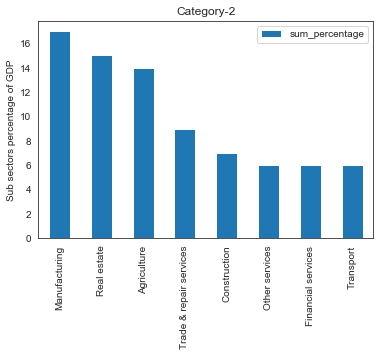

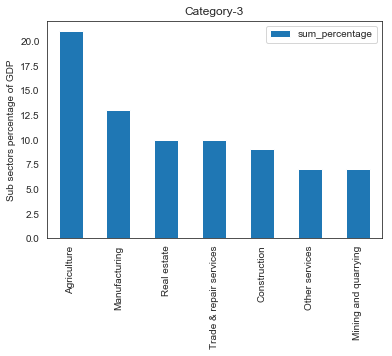

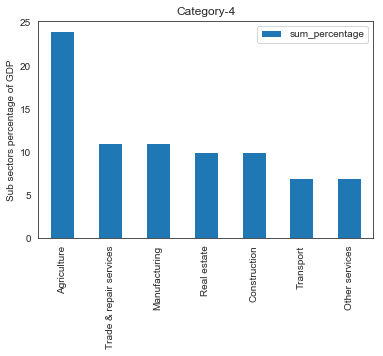

In [176]:
subsector_list=[c1_df_top,c2_df_top,c3_df_top,c4_df_top]
n=1
for data in subsector_list:
    (data[["Item","sum_percentage"]]).plot(kind="bar").set_xticklabels(data["Item"].str.split(",",expand=True)[0],rotation=90)
    plt.title("Category-"+str(n))
    plt.ylabel("Sub sectors percentage of GDP")
    n+=1
    plt.show()

##### How does the GDP distribution of the top states (C1) differ from the others?
<br>
GDP distribution for category 1 and 2 are highly concentrated in secondary sector like Manufacturing, while GDP distribution for category 3 and 4 (bottom states) are concentrated on Primary sector like Agriculture.<br/>



##### Which sub-sectors seem to be correlated with high GDP? <br>
Agriculture, forestry and fishing from Primary sector.<br>
Manufacturing from Secondary sector.<br>
Trade,Hotels,Restaurants and Real estate from Tertiary sectors are mostly correlated with high GDP

##### Which sub-sectors do the various categories need to focus on? <br>
Category 1 - Construction, Trade,Repair,Hotels and Restaurants<br>
Category 2 - Financial services , Transport<br>
Category 3 - Construction, Mining and Quarrying<br>
Category 4 - Construction, Transport

#####  To improve the per capita GDP :
**Category 1:**<br>
1.Category 1 states has to focus on categories like Construction, Trade, Hotels and restaurant as improving these will help increase the per capita GDP<br>
2.Also focus on development goals on Manufacturing and agriculture as it contributes to the maximum GDP per capita
<br> <br>
**Category 2:**<br>
1.Category 2 states has to focus on categories like Financial services and transport and devise possible goals to improve these subsectors<br>
2.Real estate being a greatest contributor in GDP per capita for category 2, they need to involve more strategic plans on maintaining the same.<br>

**Category 3:**<br>
1.Agriculture being the greatest contributed subsector in category 3,the increase productivity in agriculture is needed through appropriate policies and strategies  to affect a convergence of labour productivity across agriculture to maintain high GDP per capita<br>
2.Category 3 states has to concentrate on construction, mining and quarying as these sub sectors seem to be a potential way to increase GDP per capita<br>

**Category 4 :**<br>
1.Agriculture seem to be the major contribution, while providing Education will help improve the GDP per capita of other sub sectors as well.<br>
2.Category 4 states should concentrate more on all possible sectors like Transport, Construction and Real estate to improve their GDP per capita. <br>



## Part-II: GDP and Education Dropout Rates

In [177]:
#Importing drop out file 
dropout_df=pd.read_csv(r"C:\Users\Deepak Ramana\Downloads\gdp\rs_session243_au570_1.1.csv")


In [178]:
#Renaming the dataframe columns to resolve the data quality issue 
dropout_df=dropout_df.rename(columns={"Primary - 2014-2015":"Primary - 2013-2014",  "Primary - 2014-2015.1": "Primary - 2014-2015"})
#dropout_df

In [183]:
#union territories list to be filtered 
union_territories_list=['A & N Islands', 'Chandigarh','Dadra & Nagar Haveli','Daman & Diu', 'Delhi','Lakshadweep','Puducherry']

#Transposing data frame to filter the union territories
new_df=dropout_df.T

#Transorming data frame  
newheader1=new_df.loc["Level of Education - State"]

#Taking data lesser the header row
new_df=new_df["Primary - 2012-2013" :]

#setting new header
new_df.columns=newheader1

filtered_list1=[]
#new list that filters union territories
for i in new_df.columns.tolist():
    if i not in union_territories_list:
        filtered_list1.append(i)
       

#Data Frame that contains only states and filters Union Territories
new_df = new_df[filtered_list1]
new_df1 = new_df.T[:-1]

#Data Frame to filter only Primary,Upper Primary,Secondary for the year 2014-2015
new_df2 =new_df1[["Primary - 2014-2015", "Upper Primary - 2014-2015","Secondary - 2014-2015"]]
new_df2


,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
Level of Education - State,,,
Andhra Pradesh,6.72,5.2,15.71
Arunachal Pradesh,10.82,6.71,17.11
Assam,15.36,10.51,27.06
Bihar,NaN,4.08,25.9
Chhatisgarh,2.91,5.85,21.26
Goa,0.73,0.07,11.15
Gujarat,0.89,6.41,25.04
Haryana,5.61,5.81,15.89
Himachal Pradesh,0.64,0.87,6.07


In [180]:
#renaming column names to resolve the data mismatch- data quality issues
new_gdp_percapita_df=gdp_percapita_df.rename(columns={"Andhra_Pradesh":"Andhra Pradesh",'Arunachal_Pradesh': "Arunachal Pradesh",'Chhattisgarh':"Chhatisgarh", 
                        'Himachal_Pradesh':"Himachal Pradesh",'Jammu_Kashmir': "Jammu and Kashmir", 'Madhya_Pradesh' : "Madhya Pradesh",
                         'Tamil_Nadu':"Tamil Nadu","Uttar_Pradesh":"Uttar Pradesh","Uttarakhand":"Uttrakhand"})

In [185]:
df_new=new_gdp_percapita_df.T
df_new=df_new[32][1:]

#new dataframe created using join for GDP and Education Dropout Rates analysis
join1=new_df2.join(df_new)

#rename column
join1=join1.rename(columns={32:"gdp_percapita"})
join1


,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,gdp_percapita
Level of Education - State,,,,
Andhra Pradesh,6.72,5.2,15.71,104977
Arunachal Pradesh,10.82,6.71,17.11,112718
Assam,15.36,10.51,27.06,60621
Bihar,NaN,4.08,25.9,33954
Chhatisgarh,2.91,5.85,21.26,86860
Goa,0.73,0.07,11.15,271793
Gujarat,0.89,6.41,25.04,141263
Haryana,5.61,5.81,15.89,164077
Himachal Pradesh,0.64,0.87,6.07,147330


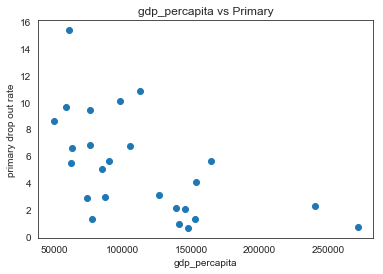

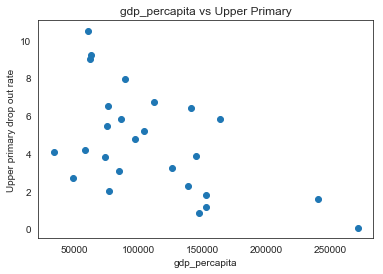

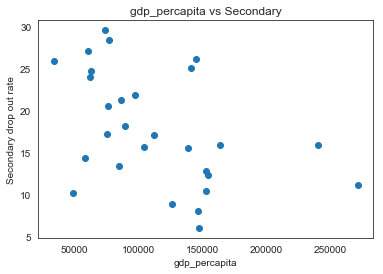

In [186]:

#plotting gdp_percapita vs Primary
plt.figure(1)
plt.title("gdp_percapita vs Primary")
plt.xlabel("gdp_percapita")
plt.ylabel("primary drop out rate")
plt.scatter(x=join1["gdp_percapita"], y=join1["Primary - 2014-2015"])

#plotting gdp_percapita vs Upper Primary 
plt.figure(2)
plt.title("gdp_percapita vs Upper Primary")
plt.xlabel("gdp_percapita")
plt.ylabel("Upper primary drop out rate")
plt.scatter(x=join1["gdp_percapita"], y=join1["Upper Primary - 2014-2015"])

#plotting gdp_percapita vs Secondary
plt.figure(3)
plt.title("gdp_percapita vs Secondary")
plt.xlabel("gdp_percapita")
plt.ylabel("Secondary drop out rate")
plt.scatter(x=join1["gdp_percapita"], y=join1["Secondary - 2014-2015"])
plt.show()



###### key insights :
As we can see from the previous scatter plot, it is clearly obvious that there is relationship between GDP per capita and drop out rate, when dropout percentage increases the gdp per capita for the state decreases. This is similar in all the three plots which means **Gdp per capita of state decreases when drop out rate increases"** <br> <br> Hence, **GDP per capita is negatively correlated with dropout rate** 